# 1) Datu ielāde

In [1]:
from lvclassify_helpers import getdata10cat
	
data_news = getdata10cat()
data_news.head()

,category,body
0,Sports,Reaģējot uz Latvijas Paralimpiskās komitejas ...
1,Sports,Latvijas tenisiste Jeļena Ostapenko šodien Ķ...
2,Sports,Latvijas Sporta federāciju padome (LSFP) iebi...
3,Sports,Jaunais sporta finansējuma modelis samazinās f...
4,Sports,Aleksandrs un Mihails Samoilovi piektdien S...


# 2) Datu priekšapstrāde

## Izveidojam funkciju datu attīrīšanai - atdalošie simboli, lielie burti, palīgvārdi.

In [2]:
from prieksapstrade import datu_prieksapstrade, tokenizacija_un_prieksapstrade, tokenizacija
tokenizacija_un_prieksapstrade("""Visvairāk atļauju (41) plānots anulēt uzņēmumam "Alfor", kam seko "Olympic Casino Latvia" ar 36 atļaujām.""")

['visvairāk',
 'atļauju',
 '41',
 'plānots',
 'anulēt',
 'uzņēmumam',
 'alfor',
 'kam',
 'seko',
 'olympic',
 'casino',
 'latvia',
 '36',
 'atļaujām']

In [3]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

# Dažādi vektorizācijas varianti. Noklusējuma sklearn tokenizers sniedz sliktākus rezulātus par spacy tokenizāciju
tfidf_ar_prieksapstradi = TfidfVectorizer(tokenizer = tokenizacija_un_prieksapstrade)
count_vec_ar_prieksapstradi = CountVectorizer(tokenizer = tokenizacija_un_prieksapstrade) # Countvectorizer kā BOW
count_vec_ngram_ar_prieksapstradi = CountVectorizer(tokenizer = tokenizacija_un_prieksapstrade, ngram_range=(1,2)) # BOW ar ngrammām, Bag of bigrams
tfidf_bez_prieksapstrades = TfidfVectorizer(tokenizer = tokenizacija)
count_vec_bez_prieksapstrades = CountVectorizer(tokenizer = tokenizacija)
count_vec_ngram_bez_prieksapstrades = CountVectorizer(tokenizer = tokenizacija, ngram_range=(1,2)) 

# 3) Modeļu apmācība / novērtēšana

## Sadalam datus 80/20

In [4]:
from sklearn.model_selection import train_test_split
x = data_news['body']
y = data_news['category']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=42)
x_train.shape, x_test.shape
# 9600 apmācības dati un 2400 testa dati

((9600,), (2400,))

## Apmācības process, statistika, pārbaudes ar piemēriem

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from pathlib import Path
import matplotlib.pyplot as plt
import pickle


def fitKlasifikatoram(vectorizer, classifier):
	clf = Pipeline([('vectorizer',vectorizer), ('classifier',classifier)])
	clf.fit(x_train, y_train)
	return clf

def metrika_saglabasana(clf, title, test_vector):
	y_pred = clf.predict(test_vector)
	cm = confusion_matrix(y_test, y_pred)
	accuracy_4dig = round(accuracy_score(y_test, y_pred), 4)
	plot = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
	plot.plot(xticks_rotation=90)
	plot.ax_.set_title(title)
	print(classification_report(y_test, y_pred, digits=4))
	plt.show()
	filenamePickle= title + '_'+ str(accuracy_4dig) + '.sav'
	#Saglabājam modeli
	with open(Path(".") / 'models' / filenamePickle, 'wb') as f:
		pickle.dump(clf, f)

def fit_metrika_saglabasana(vectorizer, classifier, title):
	clf = fitKlasifikatoram(vectorizer, classifier)
	metrika_saglabasana(clf, title, x_test)

# Atbalsta vektora mašīna 

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.9917    0.9958    0.9938       240
         Auto     0.9833    0.9792    0.9812       240
     Finanses     0.9569    0.9250    0.9407       240
         Kino     0.9875    0.9875    0.9875       240
Kriminālziņas     0.9916    0.9875    0.9896       240
   Literatūra     0.9792    0.9792    0.9792       240
       Mūzika     0.9793    0.9833    0.9813       240
     Politika     0.9707    0.9667    0.9687       240
       Sports     0.9796    1.0000    0.9897       240
 Tehnoloģijas     0.9180    0.9333    0.9256       240

     accuracy                         0.9738      2400
    macro avg     0.9738    0.9738    0.9737      2400
 weighted avg     0.9738    0.9738    0.9737      2400



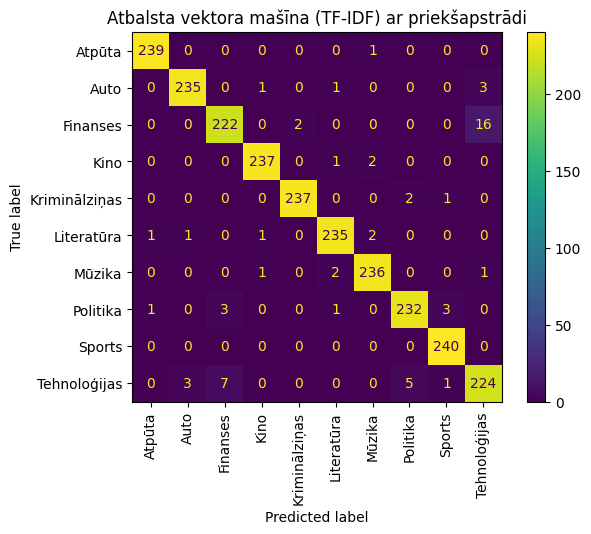

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.9793    0.9875    0.9834       240
         Auto     0.9794    0.9917    0.9855       240
     Finanses     0.9478    0.9083    0.9277       240
         Kino     0.9915    0.9750    0.9832       240
Kriminālziņas     0.9794    0.9917    0.9855       240
   Literatūra     0.9707    0.9667    0.9687       240
       Mūzika     0.9588    0.9708    0.9648       240
     Politika     0.9620    0.9500    0.9560       240
       Sports     0.9836    1.0000    0.9917       240
 Tehnoloģijas     0.9259    0.9375    0.9317       240

     accuracy                         0.9679      2400
    macro avg     0.9679    0.9679    0.9678      2400
 weighted avg     0.9679    0.9679    0.9678      2400



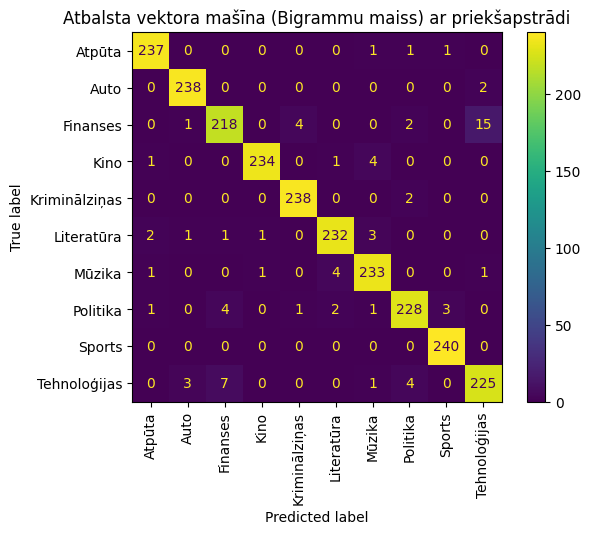

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.9833    0.9833    0.9833       240
         Auto     0.9712    0.9833    0.9772       240
     Finanses     0.9649    0.9167    0.9402       240
         Kino     0.9873    0.9750    0.9811       240
Kriminālziņas     0.9876    0.9917    0.9896       240
   Literatūra     0.9707    0.9667    0.9687       240
       Mūzika     0.9588    0.9708    0.9648       240
     Politika     0.9665    0.9625    0.9645       240
       Sports     0.9877    1.0000    0.9938       240
 Tehnoloģijas     0.9190    0.9458    0.9322       240

     accuracy                         0.9696      2400
    macro avg     0.9697    0.9696    0.9695      2400
 weighted avg     0.9697    0.9696    0.9695      2400



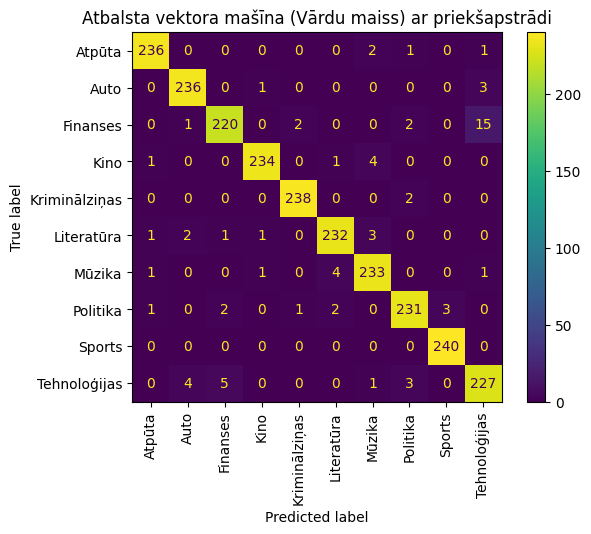

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.9835    0.9917    0.9876       240
         Auto     0.9793    0.9833    0.9813       240
     Finanses     0.9571    0.9292    0.9429       240
         Kino     0.9916    0.9875    0.9896       240
Kriminālziņas     0.9958    0.9917    0.9937       240
   Literatūra     0.9710    0.9750    0.9730       240
       Mūzika     0.9793    0.9833    0.9813       240
     Politika     0.9707    0.9667    0.9687       240
       Sports     0.9917    1.0000    0.9959       240
 Tehnoloģijas     0.9259    0.9375    0.9317       240

     accuracy                         0.9746      2400
    macro avg     0.9746    0.9746    0.9746      2400
 weighted avg     0.9746    0.9746    0.9746      2400



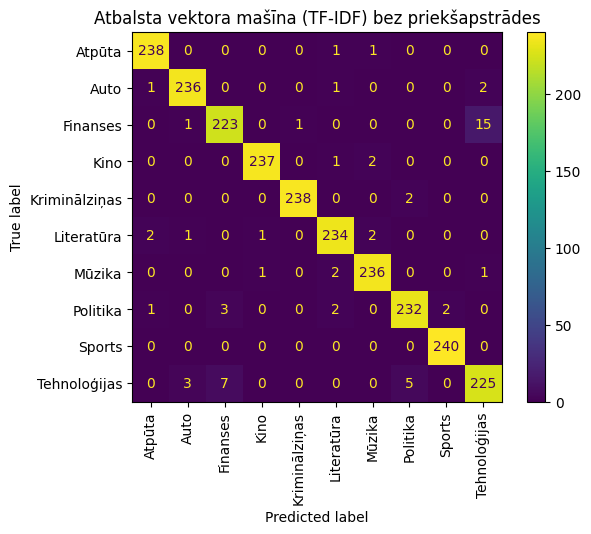

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.9671    0.9792    0.9731       240
         Auto     0.9712    0.9833    0.9772       240
     Finanses     0.9478    0.9083    0.9277       240
         Kino     0.9873    0.9708    0.9790       240
Kriminālziņas     0.9876    0.9917    0.9896       240
   Literatūra     0.9662    0.9542    0.9602       240
       Mūzika     0.9669    0.9750    0.9710       240
     Politika     0.9661    0.9500    0.9580       240
       Sports     0.9795    0.9958    0.9876       240
 Tehnoloģijas     0.9032    0.9333    0.9180       240

     accuracy                         0.9642      2400
    macro avg     0.9643    0.9642    0.9641      2400
 weighted avg     0.9643    0.9642    0.9641      2400



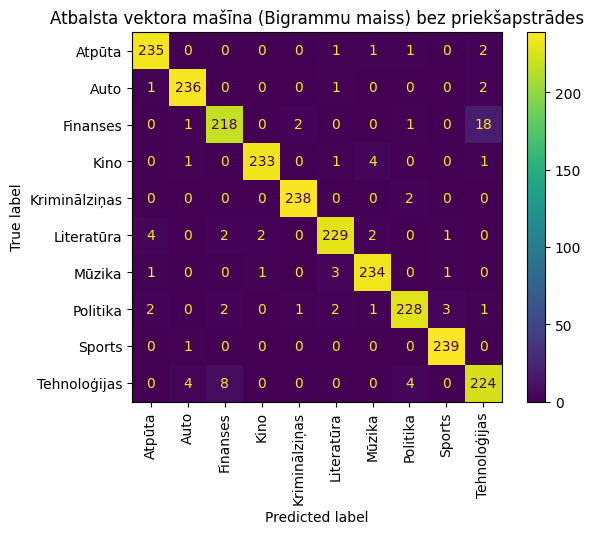

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.9751    0.9792    0.9771       240
         Auto     0.9675    0.9917    0.9794       240
     Finanses     0.9563    0.9125    0.9339       240
         Kino     0.9831    0.9708    0.9769       240
Kriminālziņas     0.9917    0.9958    0.9938       240
   Literatūra     0.9583    0.9583    0.9583       240
       Mūzika     0.9669    0.9750    0.9710       240
     Politika     0.9746    0.9583    0.9664       240
       Sports     0.9755    0.9958    0.9856       240
 Tehnoloģijas     0.9177    0.9292    0.9234       240

     accuracy                         0.9667      2400
    macro avg     0.9667    0.9667    0.9666      2400
 weighted avg     0.9667    0.9667    0.9666      2400



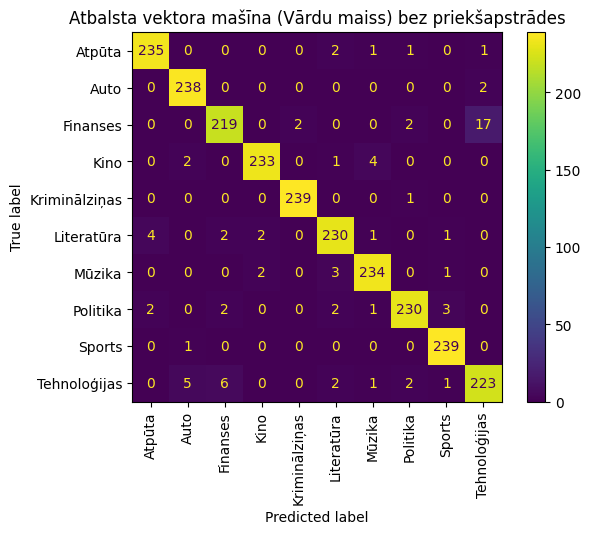

In [8]:
fit_metrika_saglabasana(tfidf_ar_prieksapstradi, LinearSVC(), "Atbalsta vektora mašīna (TF-IDF) ar priekšapstrādi")
fit_metrika_saglabasana(count_vec_ngram_ar_prieksapstradi, LinearSVC(), "Atbalsta vektora mašīna (Bigrammu maiss) ar priekšapstrādi")
fit_metrika_saglabasana(count_vec_ar_prieksapstradi, LinearSVC(), "Atbalsta vektora mašīna (Vārdu maiss) ar priekšapstrādi")
fit_metrika_saglabasana(tfidf_bez_prieksapstrades, LinearSVC(), "Atbalsta vektora mašīna (TF-IDF) bez priekšapstrādes")
fit_metrika_saglabasana(count_vec_ngram_bez_prieksapstrades, LinearSVC(), "Atbalsta vektora mašīna (Bigrammu maiss) bez priekšapstrādes")
fit_metrika_saglabasana(count_vec_bez_prieksapstrades, LinearSVC(), "Atbalsta vektora mašīna (Vārdu maiss) bez priekšapstrādes")

# Naivā Bajesa metode

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.9373    0.9958    0.9657       240
         Auto     0.9873    0.9750    0.9811       240
     Finanses     0.9513    0.8958    0.9227       240
         Kino     0.9755    0.9958    0.9856       240
Kriminālziņas     0.9555    0.9833    0.9692       240
   Literatūra     0.9871    0.9542    0.9703       240
       Mūzika     0.9833    0.9833    0.9833       240
     Politika     0.9243    0.9667    0.9450       240
       Sports     0.9957    0.9542    0.9745       240
 Tehnoloģijas     0.9241    0.9125    0.9182       240

     accuracy                         0.9617      2400
    macro avg     0.9621    0.9617    0.9616      2400
 weighted avg     0.9621    0.9617    0.9616      2400



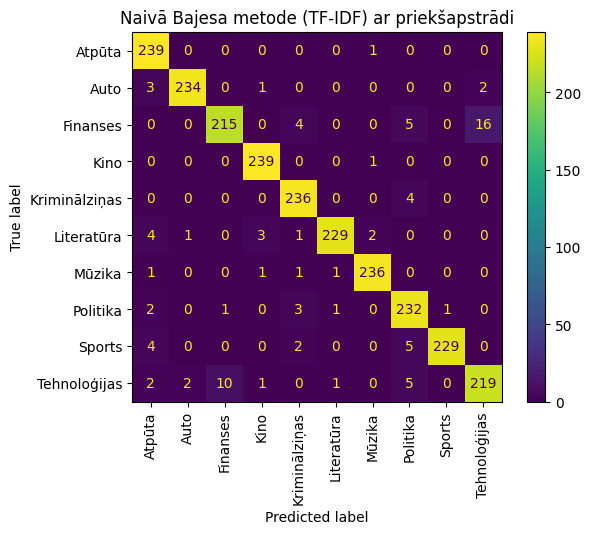

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.8691    0.9958    0.9282       240
         Auto     0.9914    0.9625    0.9767       240
     Finanses     0.9550    0.8833    0.9177       240
         Kino     0.9714    0.9917    0.9814       240
Kriminālziņas     0.9712    0.9833    0.9772       240
   Literatūra     0.9912    0.9375    0.9636       240
       Mūzika     0.9832    0.9750    0.9791       240
     Politika     0.9325    0.9792    0.9553       240
       Sports     0.9956    0.9500    0.9723       240
 Tehnoloģijas     0.9153    0.9000    0.9076       240

     accuracy                         0.9558      2400
    macro avg     0.9576    0.9558    0.9559      2400
 weighted avg     0.9576    0.9558    0.9559      2400



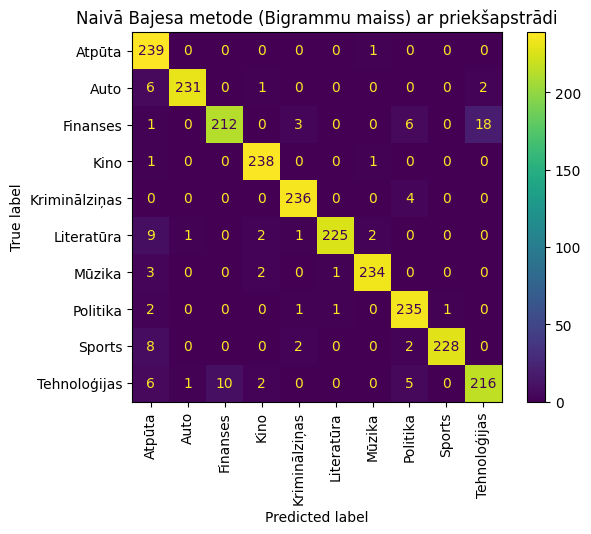

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.9560    0.9958    0.9755       240
         Auto     0.9916    0.9833    0.9874       240
     Finanses     0.9455    0.8667    0.9043       240
         Kino     0.9795    0.9958    0.9876       240
Kriminālziņas     0.9671    0.9792    0.9731       240
   Literatūra     0.9789    0.9667    0.9727       240
       Mūzika     0.9834    0.9875    0.9854       240
     Politika     0.9393    0.9667    0.9528       240
       Sports     0.9957    0.9625    0.9788       240
 Tehnoloģijas     0.8952    0.9250    0.9098       240

     accuracy                         0.9629      2400
    macro avg     0.9632    0.9629    0.9628      2400
 weighted avg     0.9632    0.9629    0.9628      2400



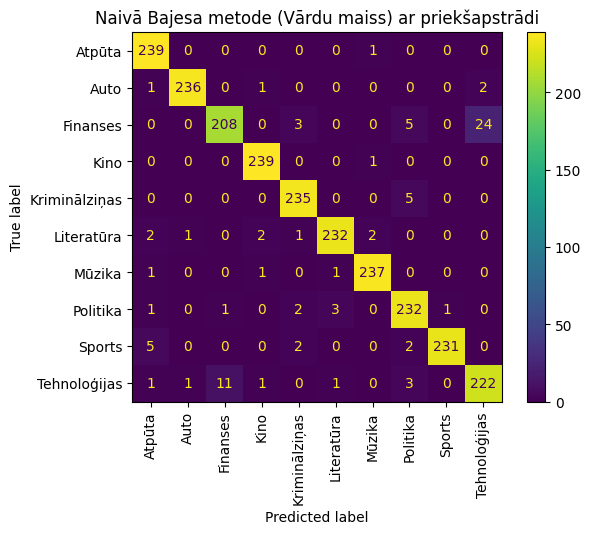

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.8951    0.9958    0.9428       240
         Auto     0.9915    0.9667    0.9789       240
     Finanses     0.9339    0.8833    0.9079       240
         Kino     0.9754    0.9917    0.9835       240
Kriminālziņas     0.9593    0.9833    0.9712       240
   Literatūra     0.9871    0.9542    0.9703       240
       Mūzika     0.9872    0.9625    0.9747       240
     Politika     0.9094    0.9625    0.9352       240
       Sports     0.9956    0.9458    0.9701       240
 Tehnoloģijas     0.9145    0.8917    0.9030       240

     accuracy                         0.9537      2400
    macro avg     0.9549    0.9537    0.9538      2400
 weighted avg     0.9549    0.9537    0.9538      2400



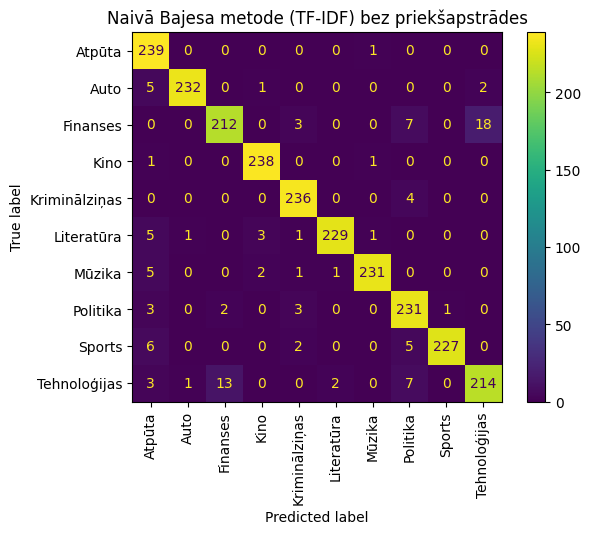

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.7940    0.9958    0.8835       240
         Auto     0.9913    0.9458    0.9680       240
     Finanses     0.9571    0.8375    0.8933       240
         Kino     0.9711    0.9792    0.9751       240
Kriminālziņas     0.9750    0.9750    0.9750       240
   Literatūra     0.9911    0.9250    0.9569       240
       Mūzika     0.9831    0.9667    0.9748       240
     Politika     0.9070    0.9750    0.9398       240
       Sports     0.9955    0.9125    0.9522       240
 Tehnoloģijas     0.8875    0.8875    0.8875       240

     accuracy                         0.9400      2400
    macro avg     0.9453    0.9400    0.9406      2400
 weighted avg     0.9453    0.9400    0.9406      2400



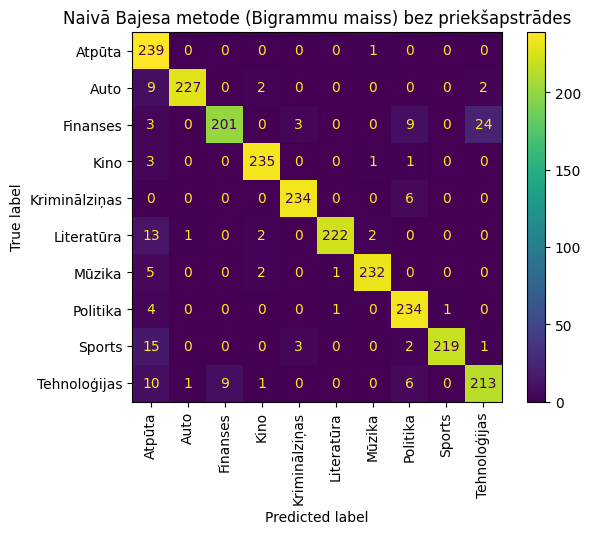

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.9300    0.9958    0.9618       240
         Auto     0.9915    0.9667    0.9789       240
     Finanses     0.9450    0.8583    0.8996       240
         Kino     0.9793    0.9875    0.9834       240
Kriminālziņas     0.9710    0.9750    0.9730       240
   Literatūra     0.9705    0.9583    0.9644       240
       Mūzika     0.9752    0.9833    0.9793       240
     Politika     0.9280    0.9667    0.9469       240
       Sports     0.9913    0.9542    0.9724       240
 Tehnoloģijas     0.8911    0.9208    0.9057       240

     accuracy                         0.9567      2400
    macro avg     0.9573    0.9567    0.9565      2400
 weighted avg     0.9573    0.9567    0.9565      2400



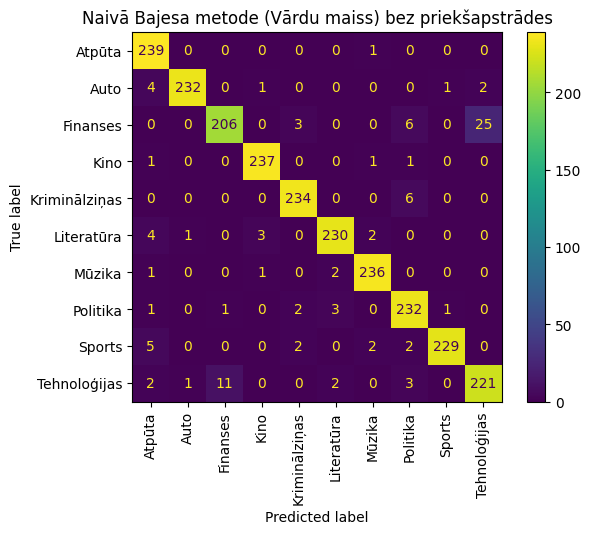

In [9]:
fit_metrika_saglabasana(tfidf_ar_prieksapstradi, MultinomialNB(), "Naivā Bajesa metode (TF-IDF) ar priekšapstrādi")
fit_metrika_saglabasana(count_vec_ngram_ar_prieksapstradi, MultinomialNB(), "Naivā Bajesa metode (Bigrammu maiss) ar priekšapstrādi")
fit_metrika_saglabasana(count_vec_ar_prieksapstradi, MultinomialNB(), "Naivā Bajesa metode (Vārdu maiss) ar priekšapstrādi")
fit_metrika_saglabasana(tfidf_bez_prieksapstrades, MultinomialNB(), "Naivā Bajesa metode (TF-IDF) bez priekšapstrādes")
fit_metrika_saglabasana(count_vec_ngram_bez_prieksapstrades, MultinomialNB(), "Naivā Bajesa metode (Bigrammu maiss) bez priekšapstrādes")
fit_metrika_saglabasana(count_vec_bez_prieksapstrades, MultinomialNB(), "Naivā Bajesa metode (Vārdu maiss) bez priekšapstrādes")

# Loģistiskā regresija

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.9835    0.9958    0.9896       240
         Auto     0.9875    0.9875    0.9875       240
     Finanses     0.9432    0.9000    0.9211       240
         Kino     0.9915    0.9667    0.9789       240
Kriminālziņas     0.9792    0.9792    0.9792       240
   Literatūra     0.9708    0.9708    0.9708       240
       Mūzika     0.9672    0.9833    0.9752       240
     Politika     0.9540    0.9500    0.9520       240
       Sports     0.9795    0.9958    0.9876       240
 Tehnoloģijas     0.9069    0.9333    0.9199       240

     accuracy                         0.9663      2400
    macro avg     0.9663    0.9662    0.9662      2400
 weighted avg     0.9663    0.9663    0.9662      2400



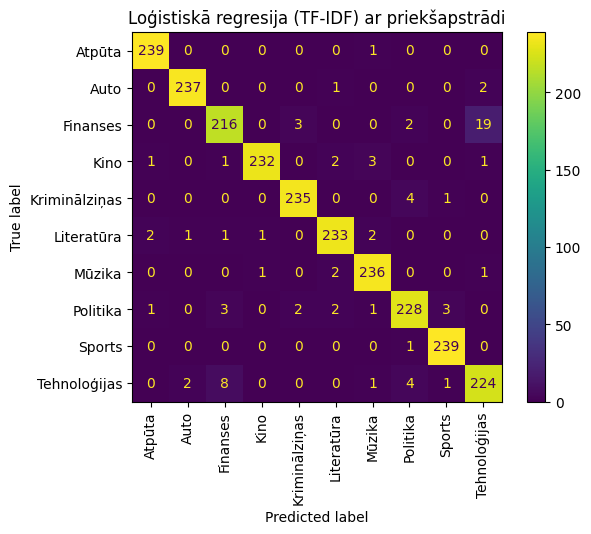

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


               precision    recall  f1-score   support

       Atpūta     0.9793    0.9875    0.9834       240
         Auto     0.9636    0.9917    0.9774       240
     Finanses     0.9474    0.9000    0.9231       240
         Kino     0.9914    0.9625    0.9767       240
Kriminālziņas     0.9833    0.9833    0.9833       240
   Literatūra     0.9662    0.9542    0.9602       240
       Mūzika     0.9588    0.9708    0.9648       240
     Politika     0.9504    0.9583    0.9544       240
       Sports     0.9876    0.9917    0.9896       240
 Tehnoloģijas     0.9069    0.9333    0.9199       240

     accuracy                         0.9633      2400
    macro avg     0.9635    0.9633    0.9633      2400
 weighted avg     0.9635    0.9633    0.9633      2400



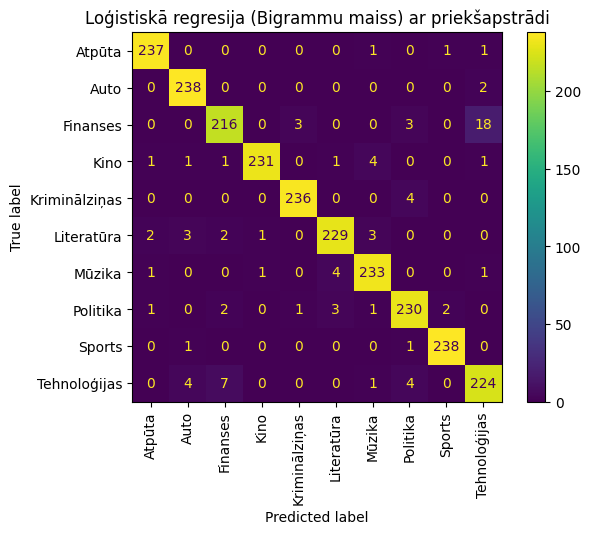

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


               precision    recall  f1-score   support

       Atpūta     0.9835    0.9917    0.9876       240
         Auto     0.9713    0.9875    0.9793       240
     Finanses     0.9518    0.9042    0.9274       240
         Kino     0.9915    0.9667    0.9789       240
Kriminālziņas     0.9917    0.9917    0.9917       240
   Literatūra     0.9583    0.9583    0.9583       240
       Mūzika     0.9627    0.9667    0.9647       240
     Politika     0.9540    0.9500    0.9520       240
       Sports     0.9877    1.0000    0.9938       240
 Tehnoloģijas     0.9116    0.9458    0.9284       240

     accuracy                         0.9663      2400
    macro avg     0.9664    0.9662    0.9662      2400
 weighted avg     0.9664    0.9663    0.9662      2400



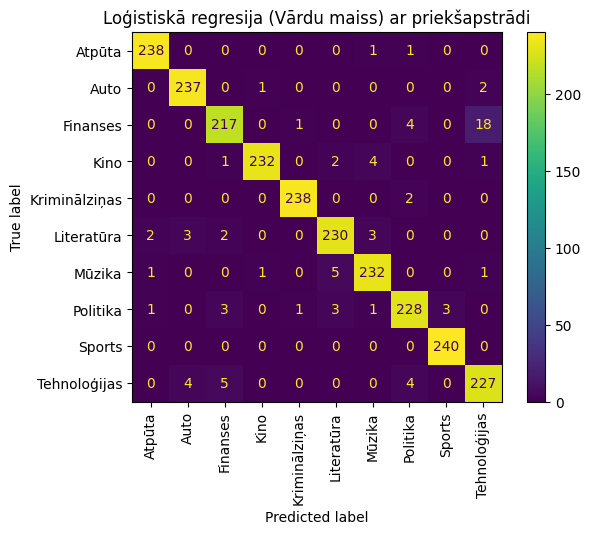

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.9636    0.9917    0.9774       240
         Auto     0.9833    0.9792    0.9812       240
     Finanses     0.9310    0.9000    0.9153       240
         Kino     0.9957    0.9750    0.9853       240
Kriminālziņas     0.9874    0.9792    0.9833       240
   Literatūra     0.9789    0.9667    0.9727       240
       Mūzika     0.9592    0.9792    0.9691       240
     Politika     0.9498    0.9458    0.9478       240
       Sports     0.9834    0.9875    0.9854       240
 Tehnoloģijas     0.8947    0.9208    0.9076       240

     accuracy                         0.9625      2400
    macro avg     0.9627    0.9625    0.9625      2400
 weighted avg     0.9627    0.9625    0.9625      2400



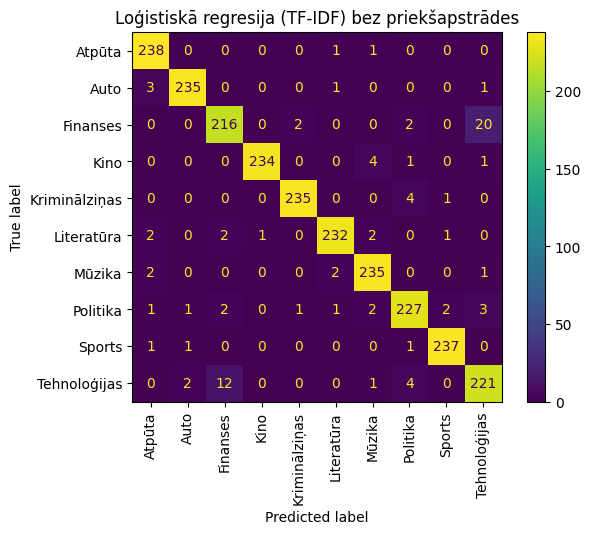

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


               precision    recall  f1-score   support

       Atpūta     0.9710    0.9750    0.9730       240
         Auto     0.9671    0.9792    0.9731       240
     Finanses     0.9353    0.9042    0.9195       240
         Kino     0.9914    0.9583    0.9746       240
Kriminālziņas     0.9751    0.9792    0.9771       240
   Literatūra     0.9582    0.9542    0.9562       240
       Mūzika     0.9551    0.9750    0.9649       240
     Politika     0.9534    0.9375    0.9454       240
       Sports     0.9673    0.9875    0.9773       240
 Tehnoloģijas     0.8943    0.9167    0.9053       240

     accuracy                         0.9567      2400
    macro avg     0.9568    0.9567    0.9566      2400
 weighted avg     0.9568    0.9567    0.9566      2400



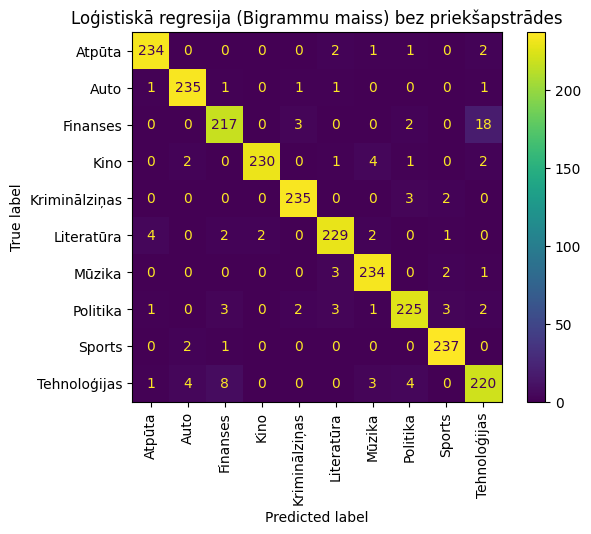

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


               precision    recall  f1-score   support

       Atpūta     0.9708    0.9708    0.9708       240
         Auto     0.9631    0.9792    0.9711       240
     Finanses     0.9342    0.8875    0.9103       240
         Kino     0.9829    0.9583    0.9705       240
Kriminālziņas     0.9751    0.9792    0.9771       240
   Literatūra     0.9623    0.9583    0.9603       240
       Mūzika     0.9551    0.9750    0.9649       240
     Politika     0.9536    0.9417    0.9476       240
       Sports     0.9715    0.9958    0.9835       240
 Tehnoloģijas     0.8821    0.9042    0.8930       240

     accuracy                         0.9550      2400
    macro avg     0.9551    0.9550    0.9549      2400
 weighted avg     0.9551    0.9550    0.9549      2400



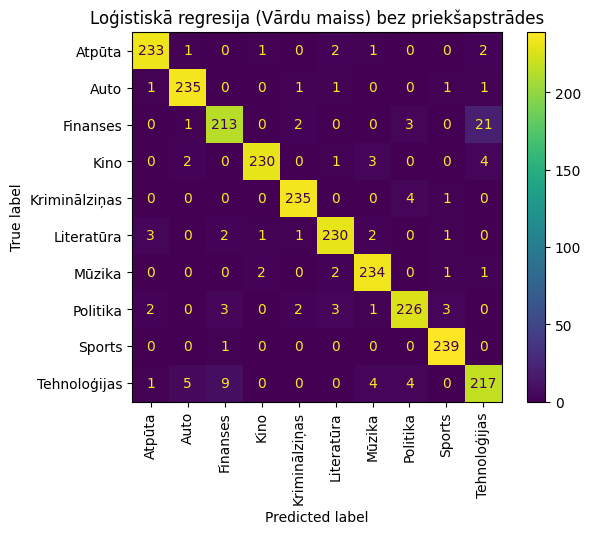

In [10]:
fit_metrika_saglabasana(tfidf_ar_prieksapstradi, LogisticRegression(), "Loģistiskā regresija (TF-IDF) ar priekšapstrādi")
fit_metrika_saglabasana(count_vec_ngram_ar_prieksapstradi, LogisticRegression(), "Loģistiskā regresija (Bigrammu maiss) ar priekšapstrādi")
fit_metrika_saglabasana(count_vec_ar_prieksapstradi, LogisticRegression(), "Loģistiskā regresija (Vārdu maiss) ar priekšapstrādi")
fit_metrika_saglabasana(tfidf_bez_prieksapstrades, LogisticRegression(), "Loģistiskā regresija (TF-IDF) bez priekšapstrādes")
fit_metrika_saglabasana(count_vec_ngram_bez_prieksapstrades, LogisticRegression(), "Loģistiskā regresija (Bigrammu maiss) bez priekšapstrādes")
fit_metrika_saglabasana(count_vec_bez_prieksapstrades, LogisticRegression(), "Loģistiskā regresija (Vārdu maiss) bez priekšapstrādes")


# Lēmumu koki

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.7642    0.7833    0.7737       240
         Auto     0.7897    0.8292    0.8089       240
     Finanses     0.7237    0.7750    0.7485       240
         Kino     0.9106    0.8917    0.9011       240
Kriminālziņas     0.8766    0.8583    0.8674       240
   Literatūra     0.8571    0.8500    0.8536       240
       Mūzika     0.8248    0.8042    0.8143       240
     Politika     0.7450    0.7792    0.7617       240
       Sports     0.8676    0.7917    0.8279       240
 Tehnoloģijas     0.6567    0.6375    0.6469       240

     accuracy                         0.8000      2400
    macro avg     0.8016    0.8000    0.8004      2400
 weighted avg     0.8016    0.8000    0.8004      2400



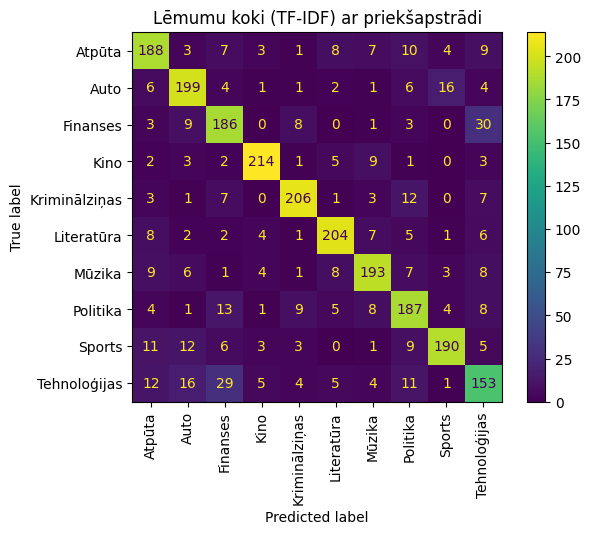

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.7872    0.7708    0.7789       240
         Auto     0.8016    0.8583    0.8290       240
     Finanses     0.7490    0.7833    0.7658       240
         Kino     0.9574    0.9375    0.9474       240
Kriminālziņas     0.9048    0.8708    0.8875       240
   Literatūra     0.8903    0.8792    0.8847       240
       Mūzika     0.8618    0.8833    0.8724       240
     Politika     0.7341    0.7708    0.7520       240
       Sports     0.8285    0.8250    0.8267       240
 Tehnoloģijas     0.7419    0.6708    0.7046       240

     accuracy                         0.8250      2400
    macro avg     0.8257    0.8250    0.8249      2400
 weighted avg     0.8257    0.8250    0.8249      2400



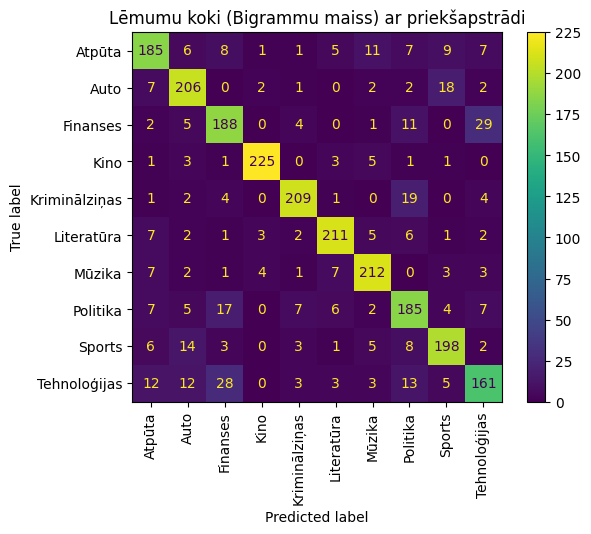

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.7974    0.7708    0.7839       240
         Auto     0.7992    0.8625    0.8297       240
     Finanses     0.7627    0.7500    0.7563       240
         Kino     0.9456    0.9417    0.9436       240
Kriminālziņas     0.8952    0.8542    0.8742       240
   Literatūra     0.8452    0.8417    0.8434       240
       Mūzika     0.8519    0.8625    0.8571       240
     Politika     0.7460    0.7833    0.7642       240
       Sports     0.8390    0.8250    0.8319       240
 Tehnoloģijas     0.6511    0.6375    0.6442       240

     accuracy                         0.8129      2400
    macro avg     0.8133    0.8129    0.8129      2400
 weighted avg     0.8133    0.8129    0.8129      2400



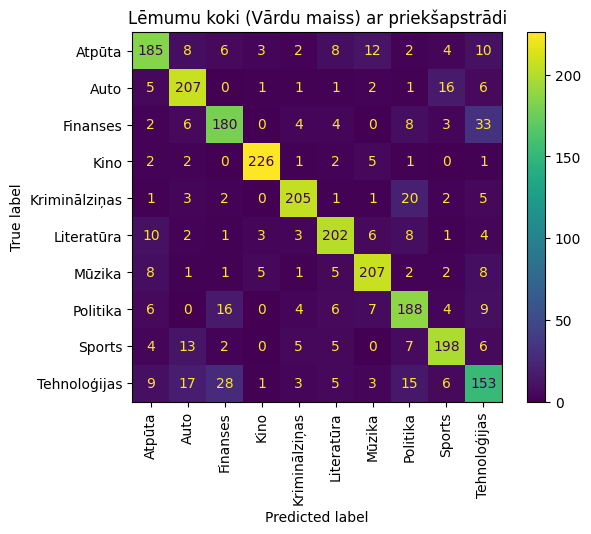

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.7667    0.7667    0.7667       240
         Auto     0.7600    0.7917    0.7755       240
     Finanses     0.7949    0.7750    0.7848       240
         Kino     0.9042    0.9042    0.9042       240
Kriminālziņas     0.8613    0.8542    0.8577       240
   Literatūra     0.8197    0.7958    0.8076       240
       Mūzika     0.7842    0.7875    0.7859       240
     Politika     0.7004    0.7792    0.7377       240
       Sports     0.8311    0.7583    0.7930       240
 Tehnoloģijas     0.6429    0.6375    0.6402       240

     accuracy                         0.7850      2400
    macro avg     0.7865    0.7850    0.7853      2400
 weighted avg     0.7865    0.7850    0.7853      2400



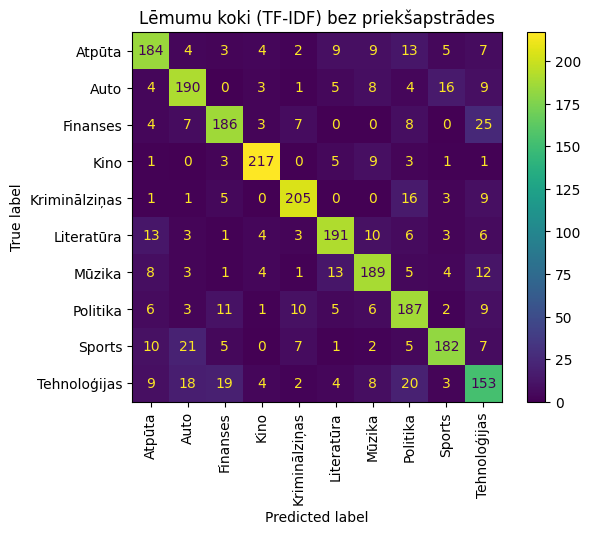

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.7911    0.7417    0.7656       240
         Auto     0.7529    0.8125    0.7816       240
     Finanses     0.7530    0.7750    0.7639       240
         Kino     0.9270    0.9000    0.9133       240
Kriminālziņas     0.8750    0.8750    0.8750       240
   Literatūra     0.8361    0.8292    0.8326       240
       Mūzika     0.8494    0.8458    0.8476       240
     Politika     0.7227    0.7167    0.7197       240
       Sports     0.8311    0.7792    0.8043       240
 Tehnoloģijas     0.6602    0.7042    0.6815       240

     accuracy                         0.7979      2400
    macro avg     0.7999    0.7979    0.7985      2400
 weighted avg     0.7999    0.7979    0.7985      2400



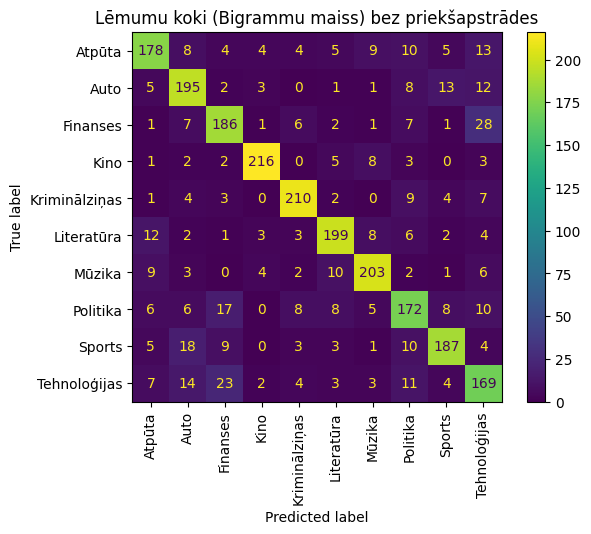

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.7686    0.7333    0.7505       240
         Auto     0.7589    0.8000    0.7789       240
     Finanses     0.7718    0.7750    0.7734       240
         Kino     0.9025    0.8875    0.8950       240
Kriminālziņas     0.8787    0.8750    0.8768       240
   Literatūra     0.8285    0.8250    0.8267       240
       Mūzika     0.8596    0.8417    0.8505       240
     Politika     0.7860    0.7500    0.7676       240
       Sports     0.8311    0.7792    0.8043       240
 Tehnoloģijas     0.6350    0.7250    0.6770       240

     accuracy                         0.7992      2400
    macro avg     0.8021    0.7992    0.8001      2400
 weighted avg     0.8021    0.7992    0.8001      2400



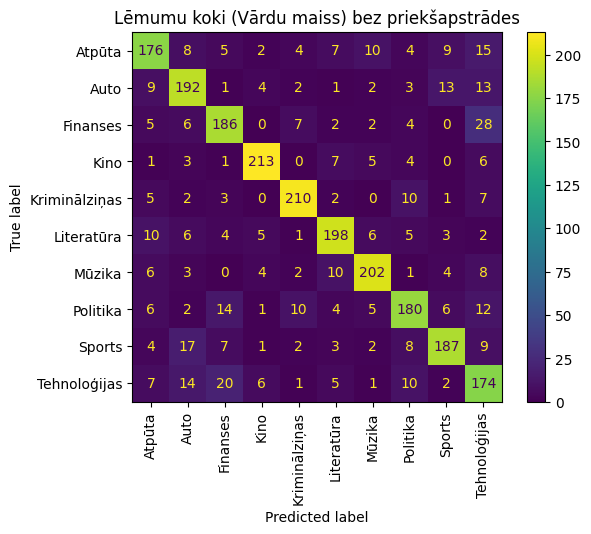

In [11]:
fit_metrika_saglabasana(tfidf_ar_prieksapstradi, DecisionTreeClassifier(), "Lēmumu koki (TF-IDF) ar priekšapstrādi")
fit_metrika_saglabasana(count_vec_ngram_ar_prieksapstradi, DecisionTreeClassifier(), "Lēmumu koki (Bigrammu maiss) ar priekšapstrādi")
fit_metrika_saglabasana(count_vec_ar_prieksapstradi, DecisionTreeClassifier(), "Lēmumu koki (Vārdu maiss) ar priekšapstrādi")
fit_metrika_saglabasana(tfidf_bez_prieksapstrades, DecisionTreeClassifier(), "Lēmumu koki (TF-IDF) bez priekšapstrādes")
fit_metrika_saglabasana(count_vec_ngram_bez_prieksapstrades, DecisionTreeClassifier(), "Lēmumu koki (Bigrammu maiss) bez priekšapstrādes")
fit_metrika_saglabasana(count_vec_bez_prieksapstrades, DecisionTreeClassifier(), "Lēmumu koki (Vārdu maiss) bez priekšapstrādes")

In [13]:
# Sporta raksts
fittedSVC = pickle.load(open("models/Atbalsta vektora mašīna (TF-IDF) bez priekšapstrādes_0.9746.sav", 'rb'))
fittedSVC.predict(["""Latvijas basketbola izlase otrdien Džakartā ar smagu zaudējumu piedzīvoja pirmo zaudējumu Pasaules kausa vēsturē, H grupas pēdējās kārtas spēlē ar 75:101 (23:13, 19:30, 15:24, 18:34) piekāpjoties teicami otro puslaiku aizvadījušajai Kanādai.

Latvija uzvarēja pirmo ceturtdaļu ar 10 punktu pārsvaru, bet atlikušajās 30 minūtēs piekāpās ar 52:88. Pēc pirmā puslaika Latvijai bija viena punkta deficīts, bet otro puslaiku Latvija zaudēja ar 33:58."""])

array(['Sports'], dtype=object)

In [14]:
# Politikas raksts
fittedSVC.predict(["""Lēmumi par kontrolpunktu slēgšanu uz Lietuvas robežas ar Baltkrieviju tiks pieņemti, ja tiks konstatēts apdraudējums, kas atbildīs kritērijiem, ko noteiks starpinstitūciju darba grupa, otrdien paziņoja Lietuvas iekšlietu viceministrs Vitālijs Dmitrijevs.

"Vienojāmies, ka, lai turpinātu slēgt robežkontroles punktus vai ierobežotu to darbību, nosakot noteiktas stundas, lai kontrolpunkts, piemēram, strādātu līdz pulksten 20 vai pulksten 18, acīmredzot ir nepieciešams visu kopīgs viedoklis," pēc vairāku ministriju, robežsardzes un citu dienestu pārstāvju tikšanās aģentūrai BNS sacīja Dmitrijevs."""])

array(['Politika'], dtype=object)

# FastText vektorizācija priekšapstrādē

In [15]:
from gensim.models import fasttext
import numpy as np
from sklearn.preprocessing import MinMaxScaler

model = fasttext.load_facebook_vectors('cc.lv.300.bin.gz')
def get_embedding(word):
    try:
        return model[word]
    except KeyError:
        return np.zeros((300,))

def calculate_embeddings_with_or_without_preprocessing(data, preprocessing=False):
    if preprocessing:
        data = data.apply(datu_prieksapstrade)
    return [np.mean([get_embedding(word) for word in sent.split() if word in model], axis=0) for sent in data]

# Calculate embeddings with preprocessing
x_train_fasttext_withPP = calculate_embeddings_with_or_without_preprocessing(x_train, preprocessing=True)
x_test_fasttext_withPP = calculate_embeddings_with_or_without_preprocessing(x_test, preprocessing=True)

# Calculate embeddings without preprocessing
x_train_fasttext_noPP = calculate_embeddings_with_or_without_preprocessing(x_train)
x_test_fasttext_noPP = calculate_embeddings_with_or_without_preprocessing(x_test)

# Scale features using MinMaxScaler
scaler = MinMaxScaler()
x_train_fasttext_withPP = scaler.fit_transform(x_train_fasttext_withPP)
x_test_fasttext_withPP = scaler.transform(x_test_fasttext_withPP)
x_train_fasttext_noPP = scaler.fit_transform(x_train_fasttext_noPP)
x_test_fasttext_noPP = scaler.transform(x_test_fasttext_noPP)

def fit_metrika_saglabasana_FastText(classifier, x_train_set, x_test_set, title):
	clf = classifier.fit(x_train_set, y_train)
	metrika_saglabasana(clf, title, x_test_set)

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.9556    0.9875    0.9713       240
         Auto     0.9636    0.9917    0.9774       240
     Finanses     0.9060    0.8833    0.8945       240
         Kino     0.9876    0.9917    0.9896       240
Kriminālziņas     0.9791    0.9750    0.9770       240
   Literatūra     0.9829    0.9583    0.9705       240
       Mūzika     0.9673    0.9875    0.9773       240
     Politika     0.9573    0.9333    0.9451       240
       Sports     0.9875    0.9875    0.9875       240
 Tehnoloģijas     0.9076    0.9000    0.9038       240

     accuracy                         0.9596      2400
    macro avg     0.9594    0.9596    0.9594      2400
 weighted avg     0.9594    0.9596    0.9594      2400



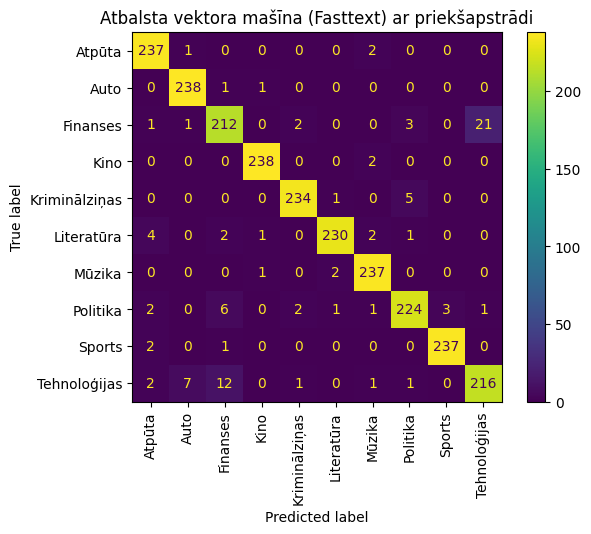

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.9516    0.9833    0.9672       240
         Auto     0.9597    0.9917    0.9754       240
     Finanses     0.9145    0.8917    0.9030       240
         Kino     0.9834    0.9875    0.9854       240
Kriminālziņas     0.9790    0.9708    0.9749       240
   Literatūra     0.9872    0.9625    0.9747       240
       Mūzika     0.9673    0.9875    0.9773       240
     Politika     0.9534    0.9375    0.9454       240
       Sports     0.9834    0.9875    0.9854       240
 Tehnoloģijas     0.9106    0.8917    0.9011       240

     accuracy                         0.9592      2400
    macro avg     0.9590    0.9592    0.9590      2400
 weighted avg     0.9590    0.9592    0.9590      2400



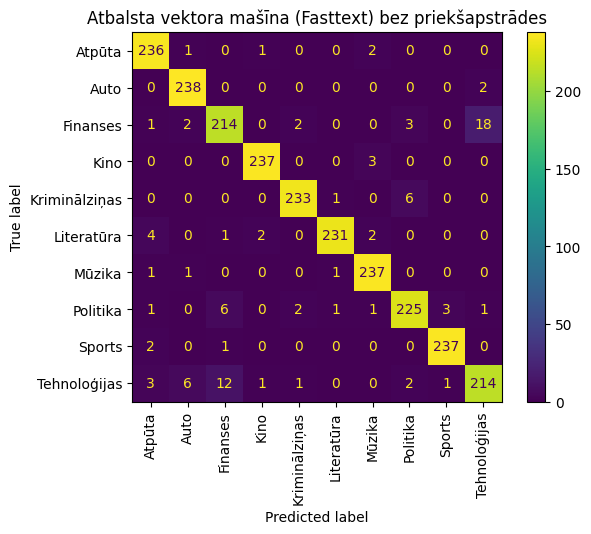

In [17]:
fit_metrika_saglabasana_FastText(LinearSVC(), x_train_fasttext_withPP, x_test_fasttext_withPP, "Atbalsta vektora mašīna (Fasttext) ar priekšapstrādi")
fit_metrika_saglabasana_FastText(LinearSVC(), x_train_fasttext_noPP, x_test_fasttext_noPP, "Atbalsta vektora mašīna (Fasttext) bez priekšapstrādes")

               precision    recall  f1-score   support

       Atpūta     0.8593    0.9667    0.9098       240
         Auto     0.9674    0.7417    0.8396       240
     Finanses     0.8469    0.7375    0.7884       240
         Kino     0.9483    0.9167    0.9322       240
Kriminālziņas     0.9526    0.9208    0.9364       240
   Literatūra     0.8920    0.9292    0.9102       240
       Mūzika     0.9649    0.9167    0.9402       240
     Politika     0.7918    0.8875    0.8369       240
       Sports     0.8353    0.8667    0.8507       240
 Tehnoloģijas     0.7581    0.8750    0.8124       240

     accuracy                         0.8758      2400
    macro avg     0.8817    0.8758    0.8757      2400
 weighted avg     0.8817    0.8758    0.8757      2400



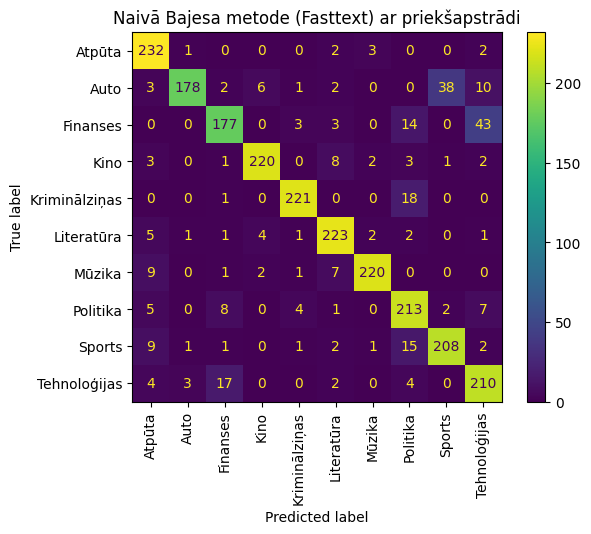

               precision    recall  f1-score   support

       Atpūta     0.7592    0.9458    0.8423       240
         Auto     0.9389    0.7042    0.8048       240
     Finanses     0.8367    0.6833    0.7523       240
         Kino     0.9548    0.8792    0.9154       240
Kriminālziņas     0.9417    0.9417    0.9417       240
   Literatūra     0.8577    0.8792    0.8683       240
       Mūzika     0.9631    0.8708    0.9147       240
     Politika     0.7438    0.8708    0.8023       240
       Sports     0.7983    0.7917    0.7950       240
 Tehnoloģijas     0.7057    0.8292    0.7625       240

     accuracy                         0.8396      2400
    macro avg     0.8500    0.8396    0.8399      2400
 weighted avg     0.8500    0.8396    0.8399      2400



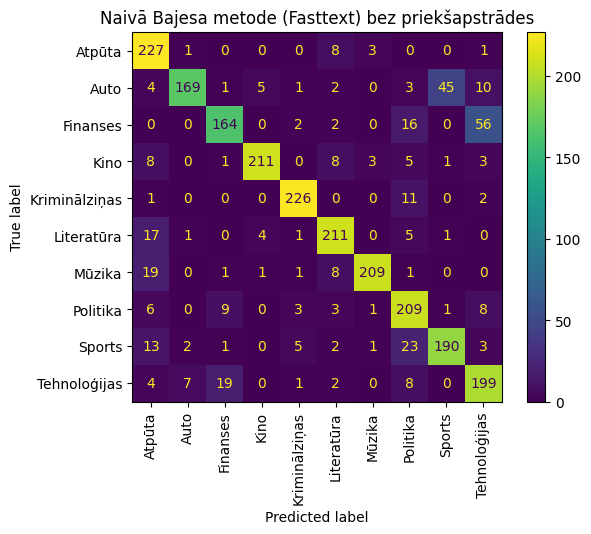

In [18]:
fit_metrika_saglabasana_FastText(MultinomialNB(), x_train_fasttext_withPP, x_test_fasttext_withPP, "Naivā Bajesa metode (Fasttext) ar priekšapstrādi")
fit_metrika_saglabasana_FastText(MultinomialNB(), x_train_fasttext_noPP, x_test_fasttext_noPP, "Naivā Bajesa metode (Fasttext) bez priekšapstrādes")

               precision    recall  f1-score   support

       Atpūta     0.7760    0.8083    0.7918       240
         Auto     0.7195    0.7375    0.7284       240
     Finanses     0.6809    0.6667    0.6737       240
         Kino     0.7888    0.8250    0.8065       240
Kriminālziņas     0.7840    0.8167    0.8000       240
   Literatūra     0.8025    0.7958    0.7992       240
       Mūzika     0.8201    0.8167    0.8184       240
     Politika     0.7679    0.7583    0.7631       240
       Sports     0.7773    0.7708    0.7741       240
 Tehnoloģijas     0.5926    0.5333    0.5614       240

     accuracy                         0.7529      2400
    macro avg     0.7510    0.7529    0.7517      2400
 weighted avg     0.7510    0.7529    0.7517      2400



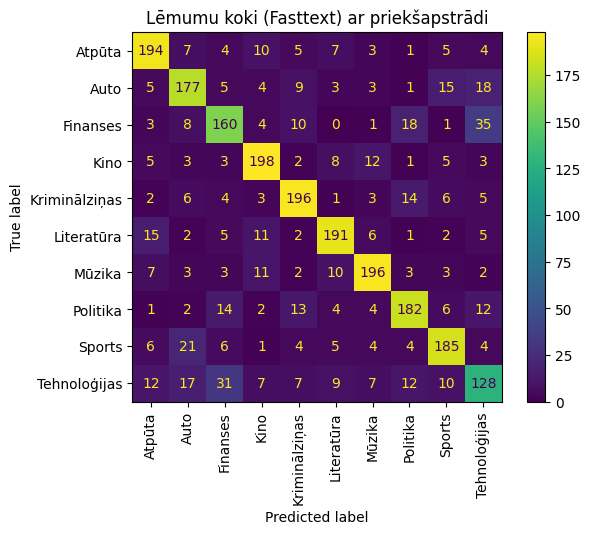

               precision    recall  f1-score   support

       Atpūta     0.7463    0.8333    0.7874       240
         Auto     0.6880    0.7625    0.7233       240
     Finanses     0.6574    0.5917    0.6228       240
         Kino     0.7302    0.7667    0.7480       240
Kriminālziņas     0.7817    0.8208    0.8008       240
   Literatūra     0.7835    0.7542    0.7686       240
       Mūzika     0.8230    0.7750    0.7983       240
     Politika     0.7397    0.7458    0.7427       240
       Sports     0.7181    0.6792    0.6981       240
 Tehnoloģijas     0.6318    0.5792    0.6043       240

     accuracy                         0.7308      2400
    macro avg     0.7300    0.7308    0.7294      2400
 weighted avg     0.7300    0.7308    0.7294      2400



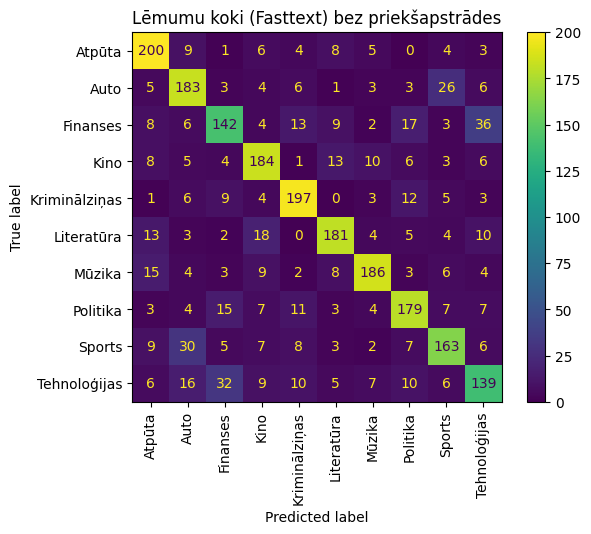

In [19]:
fit_metrika_saglabasana_FastText(DecisionTreeClassifier(), x_train_fasttext_withPP, x_test_fasttext_withPP, "Lēmumu koki (Fasttext) ar priekšapstrādi")
fit_metrika_saglabasana_FastText(DecisionTreeClassifier(), x_train_fasttext_noPP, x_test_fasttext_noPP, "Lēmumu koki (Fasttext) bez priekšapstrādes")

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


               precision    recall  f1-score   support

       Atpūta     0.9634    0.9875    0.9753       240
         Auto     0.9711    0.9792    0.9751       240
     Finanses     0.9427    0.8917    0.9165       240
         Kino     0.9875    0.9875    0.9875       240
Kriminālziņas     0.9707    0.9667    0.9687       240
   Literatūra     0.9871    0.9583    0.9725       240
       Mūzika     0.9592    0.9792    0.9691       240
     Politika     0.9221    0.9375    0.9298       240
       Sports     0.9833    0.9833    0.9833       240
 Tehnoloģijas     0.8893    0.9042    0.8967       240

     accuracy                         0.9575      2400
    macro avg     0.9577    0.9575    0.9574      2400
 weighted avg     0.9577    0.9575    0.9574      2400



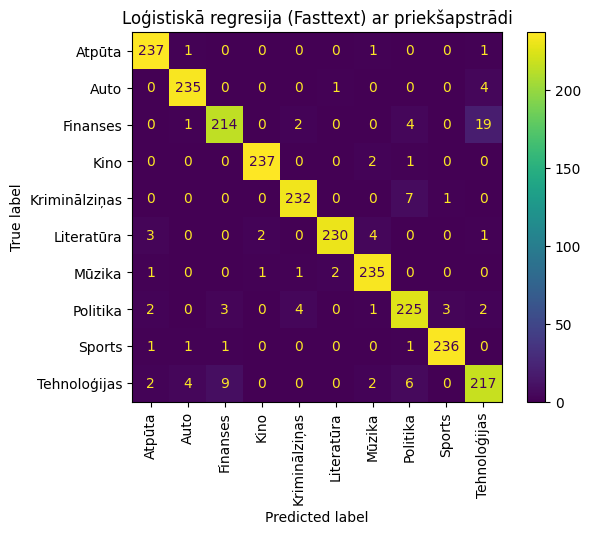

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


               precision    recall  f1-score   support

       Atpūta     0.9558    0.9917    0.9734       240
         Auto     0.9712    0.9833    0.9772       240
     Finanses     0.9167    0.8708    0.8932       240
         Kino     0.9874    0.9833    0.9854       240
Kriminālziņas     0.9708    0.9708    0.9708       240
   Literatūra     0.9789    0.9667    0.9727       240
       Mūzika     0.9631    0.9792    0.9711       240
     Politika     0.9331    0.9292    0.9311       240
       Sports     0.9874    0.9833    0.9854       240
 Tehnoloģijas     0.8926    0.9000    0.8963       240

     accuracy                         0.9558      2400
    macro avg     0.9557    0.9558    0.9557      2400
 weighted avg     0.9557    0.9558    0.9557      2400



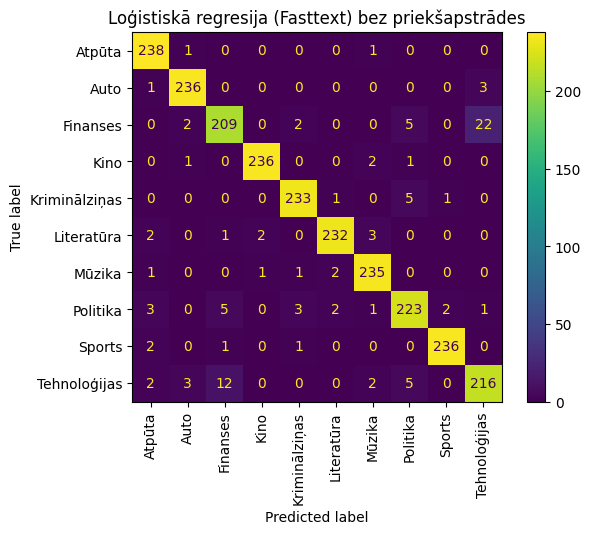

In [20]:
fit_metrika_saglabasana_FastText(LogisticRegression(), x_train_fasttext_withPP, x_test_fasttext_withPP, "Loģistiskā regresija (Fasttext) ar priekšapstrādi")
fit_metrika_saglabasana_FastText(LogisticRegression(), x_train_fasttext_noPP, x_test_fasttext_noPP, "Loģistiskā regresija (Fasttext) bez priekšapstrādes")